In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('UC Elections (Responses) - Form Responses 1.csv', index_col = 'Timestamp')

In [3]:
candidates = ['Eduardo A. Gonzalez ’18, with running mate Alex Popovski ’19', 
              'Scott Ely ’18, with running mate Evan M. Bonsall ’19', 
              'Yasmin Z. Sachee ’18, with running mate Cameron K. Khansarinia ’18',
              'Grant S. Solomon ’18, with running mate Alexander T. Moore ’18']
years = ['Freshman', 'Sophomore', 'Junior', 'Senior']

In [4]:
voting = df[df['Are you planning to vote in the UC Election?'] == 'Yes']

In [5]:
year_breakdown = voting.groupby(voting['What year are you?']).count()['Are you planning to vote in the UC Election?']
year_breakdown = year_breakdown.reindex(years)

In [6]:
year_breakdown

What year are you?
Freshman     69
Sophomore    66
Junior       62
Senior       24
Name: Are you planning to vote in the UC Election?, dtype: int64

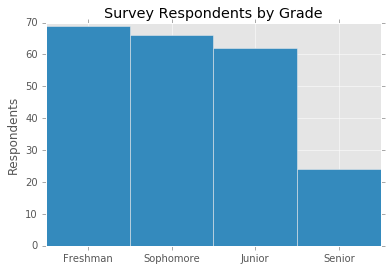

In [7]:
plt.bar(np.arange(0, 4), year_breakdown.values, width = 1.0)
plt.title("Survey Respondents by Grade")
plt.xticks(np.arange(0.5, 4), years)
plt.ylabel('Respondents')
plt.show()

In [8]:
voting_breakdown = voting.groupby(voting['If yes, who are you planning to vote for?']).count().ix[::,0]
voting_breakdown = voting_breakdown.reindex(candidates)

In [9]:
voting_breakdown

If yes, who are you planning to vote for?
Eduardo A. Gonzalez ’18, with running mate Alex Popovski ’19          74
Scott Ely ’18, with running mate Evan M. Bonsall ’19                  59
Yasmin Z. Sachee ’18, with running mate Cameron K. Khansarinia ’18    80
Grant S. Solomon ’18, with running mate Alexander T. Moore ’18         6
Name: What year are you?, dtype: int64

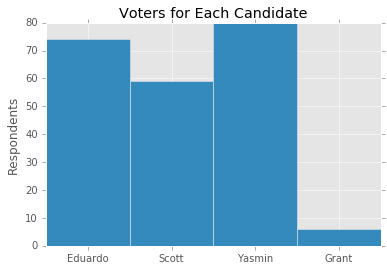

In [10]:
plt.bar(np.arange(0, 4), voting_breakdown.values, width = 1.0)
plt.title("Voters for Each Candidate")
plt.xticks(np.arange(0.5, 4), ['Eduardo', 'Scott', 'Yasmin', 'Grant'])
plt.ylabel('Respondents')
plt.show()

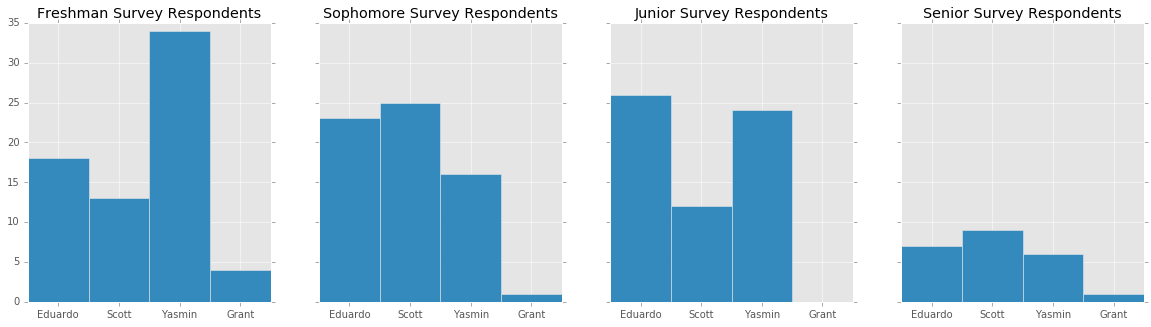

In [11]:
fig, ax = plt.subplots(1, 4, figsize = (20, 5), sharex = True, sharey = True)
ax_ind = 0

for year in years:
    year_df = voting[voting['What year are you?'] == year]
    grouped = year_df.groupby(year_df['If yes, who are you planning to vote for?']).count()
    
    votes, vote_ind = np.zeros(4), 0
    
    for ticket in candidates:
        try:
            votes[vote_ind] = grouped.ix[::,0][ticket]
        except:
            votes[vote_ind] = 0
            
        vote_ind += 1
        
    ax[ax_ind].bar(np.arange(0, 4), votes, width = 1.0)
    ax[ax_ind].set_title(year + " Survey Respondents")
    plt.xticks(np.arange(0.5, 4), ['Eduardo', 'Scott', 'Yasmin', 'Grant'])
    ax_ind += 1